Linear Regression Implementation

This experiment uses the lr2_data.txt dataset, which contains a simulated house area and price data.
To obtain the dataset, see the Lab Environment Setup.


Step 1 Import dependencies.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Step 2  Define the function for calculating gradients.

In [2]:
def generate_gradient(X, theta, y):
    sample_count = X.shape[0]
    #Calculate the gradient based on the matrix 1/mΣ(((h(x^i)-y^i))x_j^i)
    return (1 / sample_count)*X.T.dot(X.dot(theta)-y)

Step 3 Define the function for reading datasets

In [13]:
def get_training_data(file_path):
    orig_data = np.loadtxt(file_path,skiprows=1)#Ignore the title in the first row of the dataset.
    cols =orig_data.shape[1]
    return(orig_data, orig_data[:, :cols-1], orig_data[:, cols-1:])

Step 4 Define the function for intializing parameters

In [14]:
#Initialize the θ array.
def init_theta(feature_count):
    return np.ones(feature_count).reshape(feature_count, 1)

Step 5 Define the function for implementing the gradient descent

In [4]:
def gradient_descending(X, y, theta, alpha):
    Jthetas = [] #Record the change trend of the cost function J(θ) to confirm the gradient descent is correc.
    #Calculate the loss function , which is equal to the square of the difference between the actual value and the predicted value: (y^i-h(c^i))
    Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
    index = 0
    gradient = generate_gradient(X, theta, y) #Calculate the gradient.
    while not np.all((np.absolute(gradient) <= 1e-5)): #End the calculation when the gradient is less than 0.00001.
        theta = theta - alpha * gradient
        gradient = generate_gradient(X, theta, y) #Calculate the new gradient.
        #Calculate the loss function, which is equal to the square of the difference between the actualvalue anf the predicted value: (y^i-h(x^i))^2
        Jtheta = (X.dot(theta)-y).T.dot(X.dot(theta)-y)
        if(index+1)%10==0:
            Jthetas.append((index, Jtheta[0])) #Record the result every 10 calculations
        index+=1
    return theta, Jthetas

Step 6 Define the function for visualizing the change curve of the loss function

In [5]:
#Plot the loss function change curve.
def showJtheta(diff_value):
    p_x = []
    p_y = []
    for (index, sum) in diff_value:
        p_x.append(index)
        p_y.append(sum)
    plt.plot(p_x, p_y, color='b')
    plt.xlabel("steps")
    plt.ylabel("loss function")
    plt.title('step-loss function curve')
    plt.show()

Step 7 Define the function for visualizin data points and the fitted curve

In [6]:
#Plot the actual data points and the fitted curve
def showlinecurve(theta, sample_training_set):
    x, y = sample_training_set[:, 1], sample_training_set[:,2]
    z = theta[0] + theta[1] * x
    plt.scatter(x, y, color='b', marker='x', label="Sample data")
    plt.plot(x, z, 'r', color='r', label="regression curve")
    plt.xlabel('x')
    plt.ylabel('Y')
    plt.title('linear regression curve')
    plt.legend()
    plt.show()

Step 8 Plot the final results.

w:3.0076279423997594 b:1.668677412281192


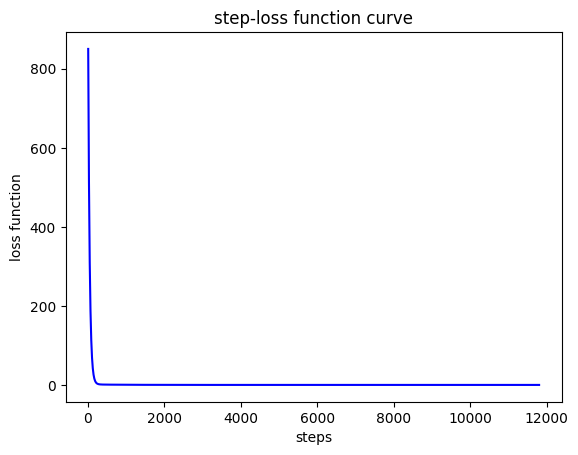

C:\Users\t37882867\AppData\Local\Temp\ipykernel_10048\2581885657.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x, z, 'r', color='r', label="regression curve")


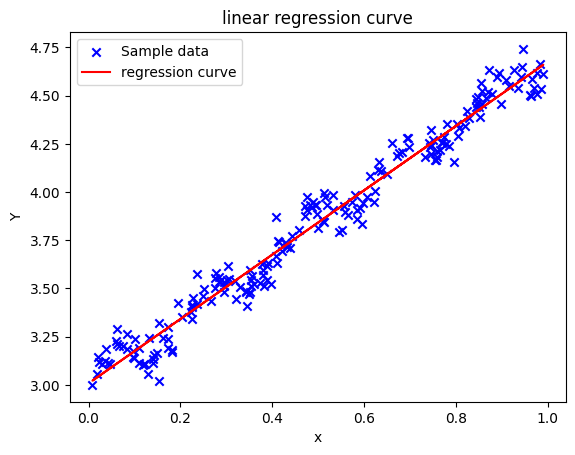

In [15]:
#Read the datset
training_data_include_y, training_x, y = get_training_data("../Practicals-Dataset/02/lr2_data.txt")
#Obtain he number of samples and features respectively.
sample_count, feature_count = training_x.shape
#Define the learning step α.
alpha = 0.01
#Initialize θ.
theta = init_theta(feature_count)
#Obtain the final parameter θ and cost
result_theta, Jthetas = gradient_descending(training_x, y, theta, alpha)
#Display the parameter.
print("w:{}".format(result_theta[0][0]), "b:{}".format(result_theta[1][0]))
showJtheta(Jthetas)
showlinecurve(result_theta, training_data_include_y)